# Load Datasets

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import dynamicalab as dlb
from networkx.algorithms import bipartite
import seaborn as sns
import numpy as np
sns.set_style("ticks")

In [2]:
data_path = "./data"
file_name = "./kato1990.png"
data = dlb.plants_pollinators_Kato1990(data_path)

### Ramirez 1992

In [3]:
G = data.graph()
N = G.number_of_nodes()
print("Number of nodes: %i"%G.number_of_nodes())
print("Number of edges: %i"%G.number_of_edges())


Number of nodes: 768
Number of edges: 1193


In [4]:
Gc = nx.connected_component_subgraphs(G)
groups = []
k = 0
for g in Gc:
    k +=1 
    if bipartite.is_bipartite(g):
        top, bottom = bipartite.sets(g)
        groups.append(list(top))
        groups.append(list(bottom))
    else:
        groups.append(list(g.nodes()))
        
print("Number of components: %i"%k)

Number of components: 2


In [5]:
current_palette = sns.color_palette()

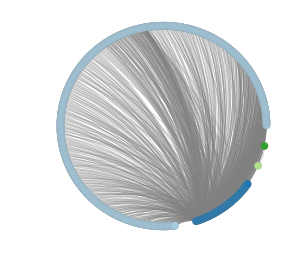

In [6]:
pos = dlb.drawing.group_radial_layout(G=G, dx=0.0, dy=0.0, groups=groups, margin=0.2)

node_colors = [0]*N
predefined_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i,sub_group in enumerate(groups):
    for n in sub_group:
        j = np.argwhere(np.array(G.nodes())-n==0)
        node_colors[int(j)] = predefined_colors[i]
    
plt.figure(figsize=(3,3), dpi=100)
dlb.drawing.draw_networks(G, pos=pos, ax=plt.gca(),node_color=node_colors,node_width=0.1,
                          edge_width=0.5,
                          edge_color="gray", 
                          node_border_color="gray",
                          edge_alpha=0.4,
                          node_size=30,
                          arrow_scale=0)
plt.savefig(file_name, dpi=150)